# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [ ]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline
%config InlineBackend.figure_format="retina"  # only for retina display

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['legend', 'axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [ ]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

In [ ]:
norm_sample = norm_distr.rvs(N)
laplace_sample = laplacian_distr.rvs(N)
cauchy_sample = cauchy_distr.rvs(N)

Постройте график плотности распределения для всех трех распределений на одних осях.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

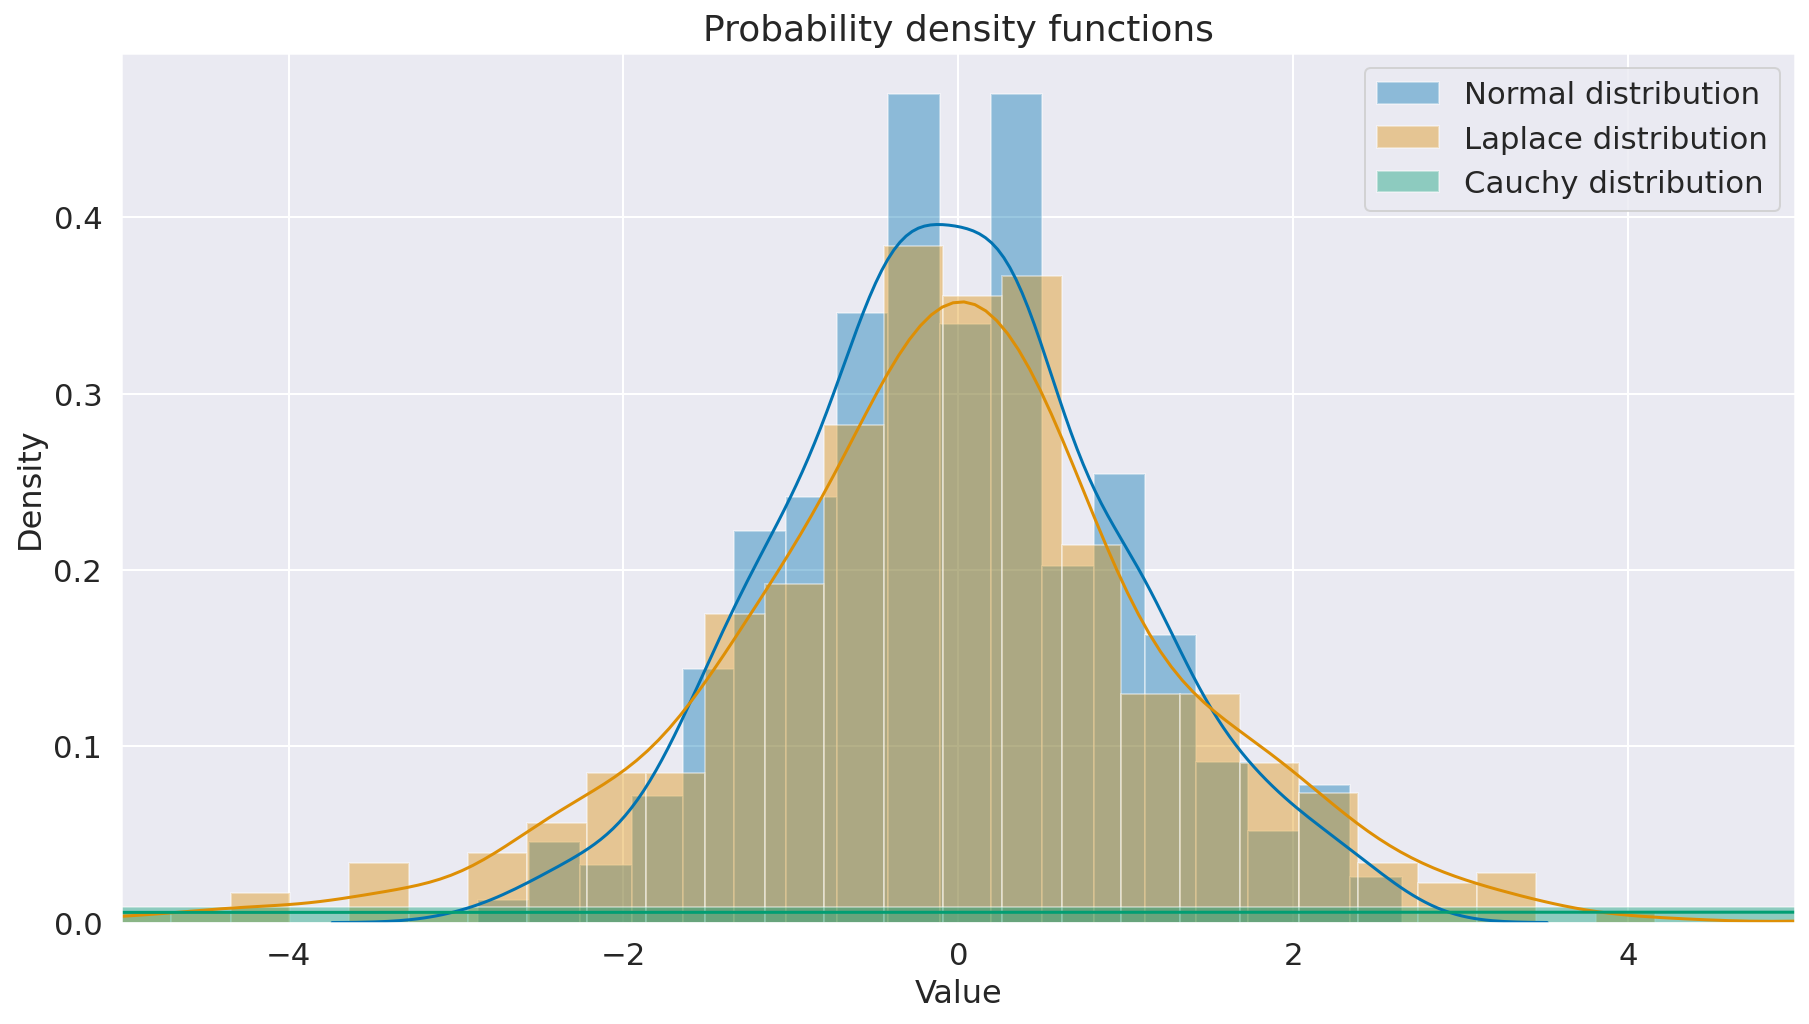

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Probability density functions', fontsize=18)

sns.distplot(norm_sample, color=color_for_normal, label='Normal distribution')
sns.distplot(laplace_sample, color=color_for_laplace, label='Laplace distribution')
sns.distplot(cauchy_sample, color=color_for_cauchy, label='Cauchy distribution')

plt.xlabel('Value', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xlim((-5, 5))
plt.legend()
plt.show()

In [ ]:
# Выброс размером в 5000 сильно портил верхний график
np.sort(cauchy_sample)[-5:]

array([  48.52493727,   71.24428112,  230.61447827,  264.28114299,
       5115.49470199])

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Для того, чтобы график выглядел читаемое, пришлось ограничить длину по оси X. Произошло это потому что распределение Коши имеет тяжелые хвосты, то есть элементы нашей выборки могут часто выскакивать в "хвост" распределения принимая большие положительные значения.

Искать значение матожидания по выборке будет явно сложнее для распределения Коши, так как у него встречается много больших значений, что я описал выше. Поэтому среднее значение будет плохо оценивать значение математического ожидания.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [ ]:
import math

def truncated_mean(sample, alpha=0.3):
    assert alpha <= 0.5
    sorted = np.sort(sample)
    elements_to_cut_left = int(len(sample) * alpha)
    elements_to_cut_right = len(sample) - elements_to_cut_left
    if elements_to_cut_left == elements_to_cut_right:
      elements_to_cut_right += 1
    return np.mean(sorted[elements_to_cut_left: elements_to_cut_right])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [ ]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    upper = distr.ppf(1 - alpha)
    result = quad(lambda x : x**2 * distr.pdf(x), 0, upper)[0]
    
    return 2 * (result + alpha * np.power(upper, 2)) / np.power(1 - 2 * alpha, 2)

Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на разных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для заголовка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

In [ ]:
def count_asymp_var_on_grid(distr, grid: np.array):
  res = np.vectorize(asymp_var)(distr, alpha_grid)
  # print(res)
  return res

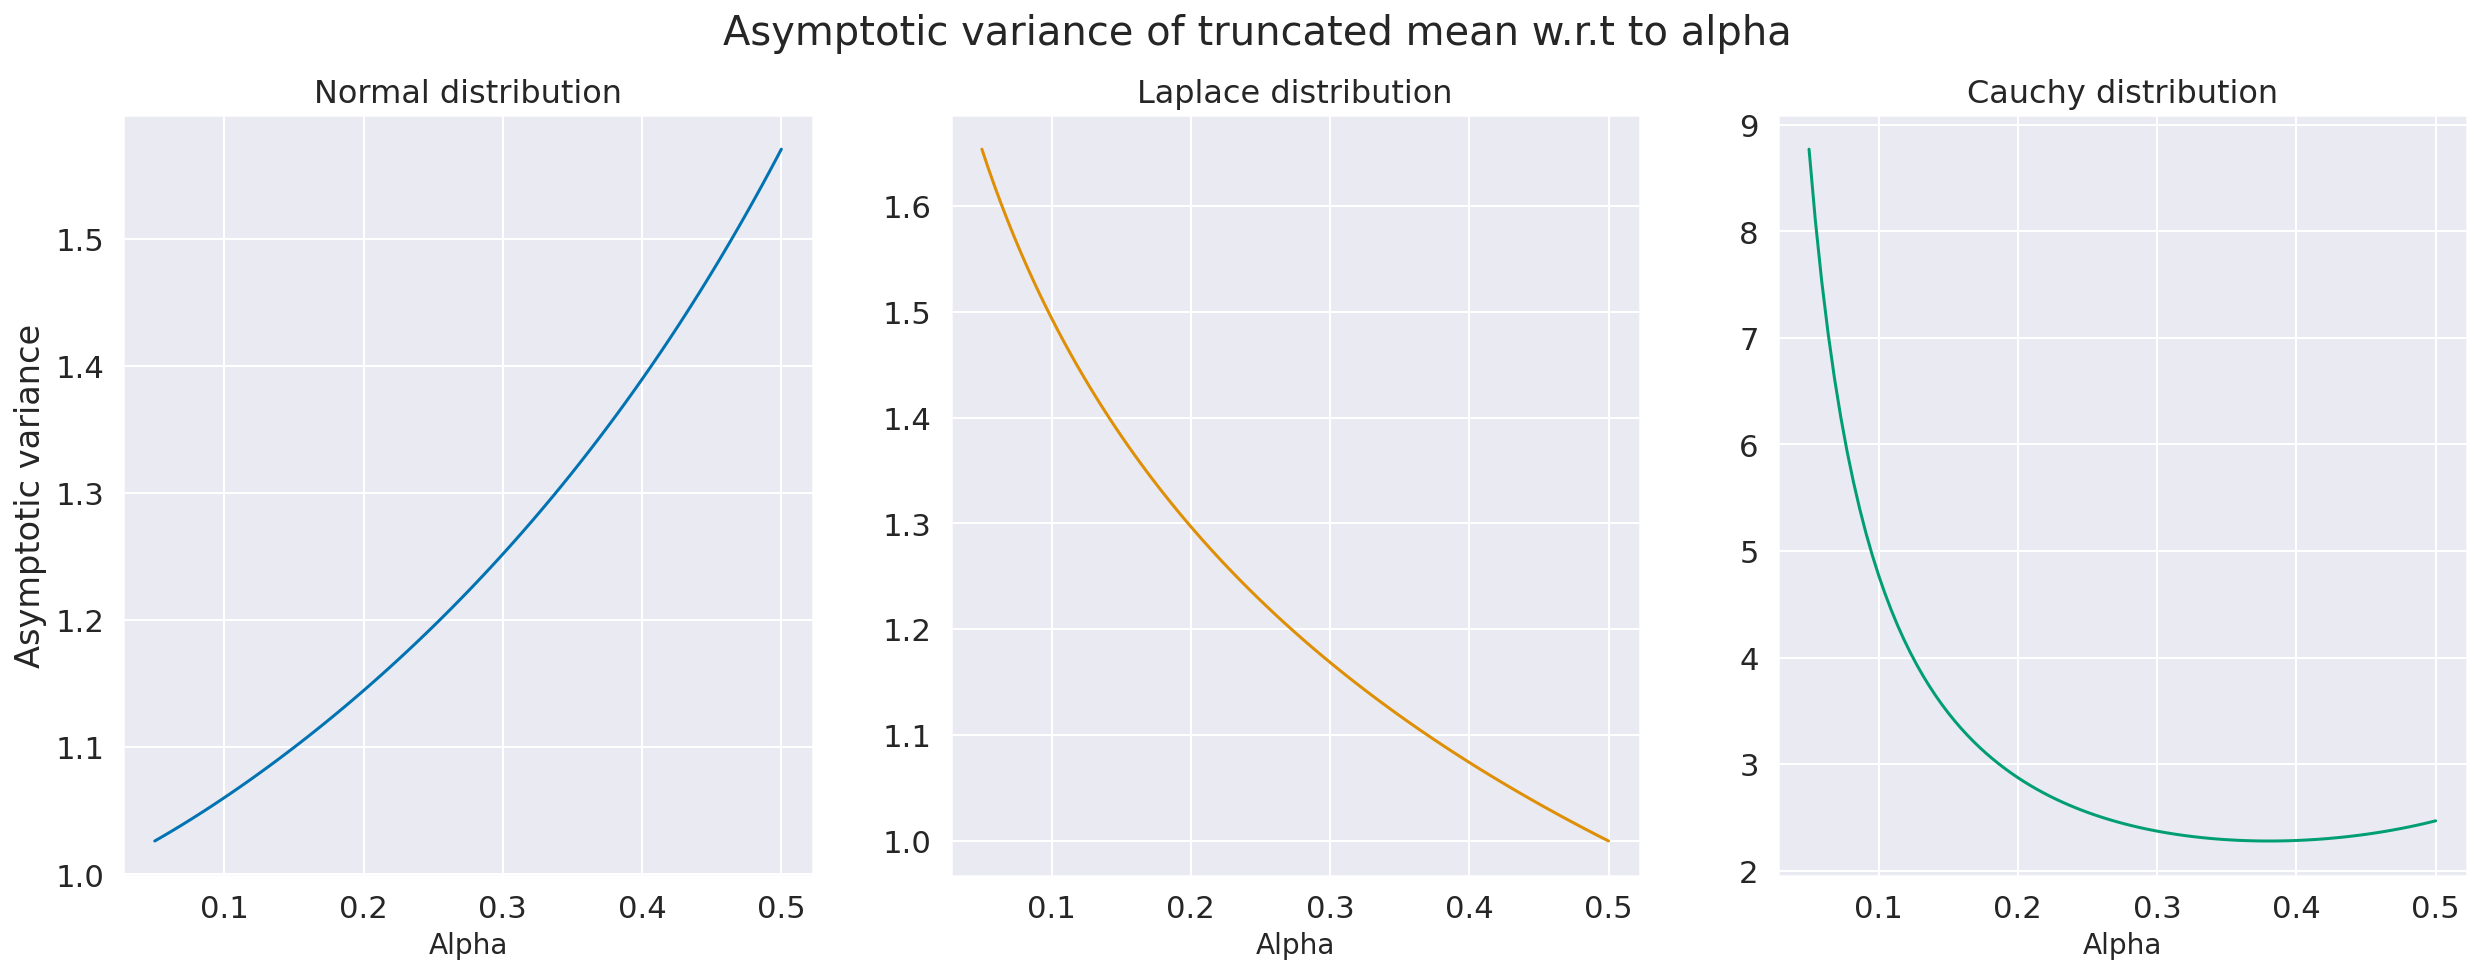

In [ ]:
alpha_grid = np.linspace(0.05, 0.49999, 100)
fig, axis = plt.subplots(1, 3, figsize=(21,7))

axis[0].plot(alpha_grid, count_asymp_var_on_grid(norm_distr, grid), color=color_for_normal)
axis[1].plot(alpha_grid, count_asymp_var_on_grid(laplacian_distr, grid), color=color_for_laplace)
axis[2].plot(alpha_grid, count_asymp_var_on_grid(cauchy_distr, grid), color=color_for_cauchy)

axis[0].set_title('Normal distribution', fontsize=16)
axis[1].set_title('Laplace distribution', fontsize=16)
axis[2].set_title('Cauchy distribution', fontsize=16)

axis[0].set_ylabel('Asymptotic variance')
axis[0].set_xlabel('Alpha', fontsize=14)
axis[1].set_xlabel('Alpha', fontsize=14)
axis[2].set_xlabel('Alpha', fontsize=14)

fig.suptitle('Asymptotic variance of truncated mean w.r.t to alpha', fontsize=20)
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** Усеченное среднее порядка 0.5 – это медиана, порядка 0 – обычное выборочное среднее.

Как мы видим для нормального распределения асимптотическая дисперсия усеченного среднего растет при увеличении $\alpha$. Это говорит о том что для оценивания математического ожидания для данного распределения лучше выбирать выборочное среднее оно будет немного лучше потому что асимптотическая дисперсия немного меньше.

Для распределения Лапласа же, наоборот, асимптотическая дисперсия усеченного среднего убывает при увеличении $\alpha$, что говорит об обратном – для оценивания математического ожидания лучше выбирать медиану она будет немного лучше потому что асимптотическая дисперсия немного меньше. Такое влияние, скорее всего, оказывает более тяжелый "хвост" в силу того что степень $х$ в экспоненте меньше на 1 по сравнению с нормальным распределением.

В случае распределения Коши, исходя из графика, между выборочным средним и медианой явно лучше выбирать медиану, потому что у нее дисперсия сильно меньше. Однако вообще есть значения $\alpha$ при которых асимптотическая дисперсия меньше. 

Для каждого распределения на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [ ]:
def mean_on_subsamples(sample: np.array) -> np.array:
  return np.cumsum(sample) / (np.arange(len(sample)) + 1)

def median_on_subsamples(sample: np.array) -> np.array:
  return np.array([np.median(sample[:i + 1]) for i in range(len(sample))])

def truncated_mean_on_subsamples(sample: np.array, alpha=0.35) -> np.array:
  return np.array([truncated_mean(sample[:i + 1], alpha) for i in range(len(sample))])

In [ ]:
def plot_means_comparison(sample: np.array, color, distribution_name, alpha=0.35):
  fig, axis = plt.subplots(figsize=(18,8))
  plt.title(f'Means comparison for {distribution_name}', fontsize=18)
  grid = np.arange(len(sample)) + 1

  # Common mean
  axis.plot(grid, mean_on_subsamples(sample), color=color, label='Mean')
  # Median
  axis.plot(grid, median_on_subsamples(sample), ':', color=color, label='Median')
  # Truncated mean
  axis.plot(grid, truncated_mean_on_subsamples(sample, alpha), '--', color=color, 
           label=r'Truncated mean with $\alpha=$ {}'.format(alpha))

  axis.set_xlabel('Sample size', fontsize=16)
  axis.set_ylabel('Value', fontsize=16)
  plt.legend()
  plt.show()

**Нормальное распределение**

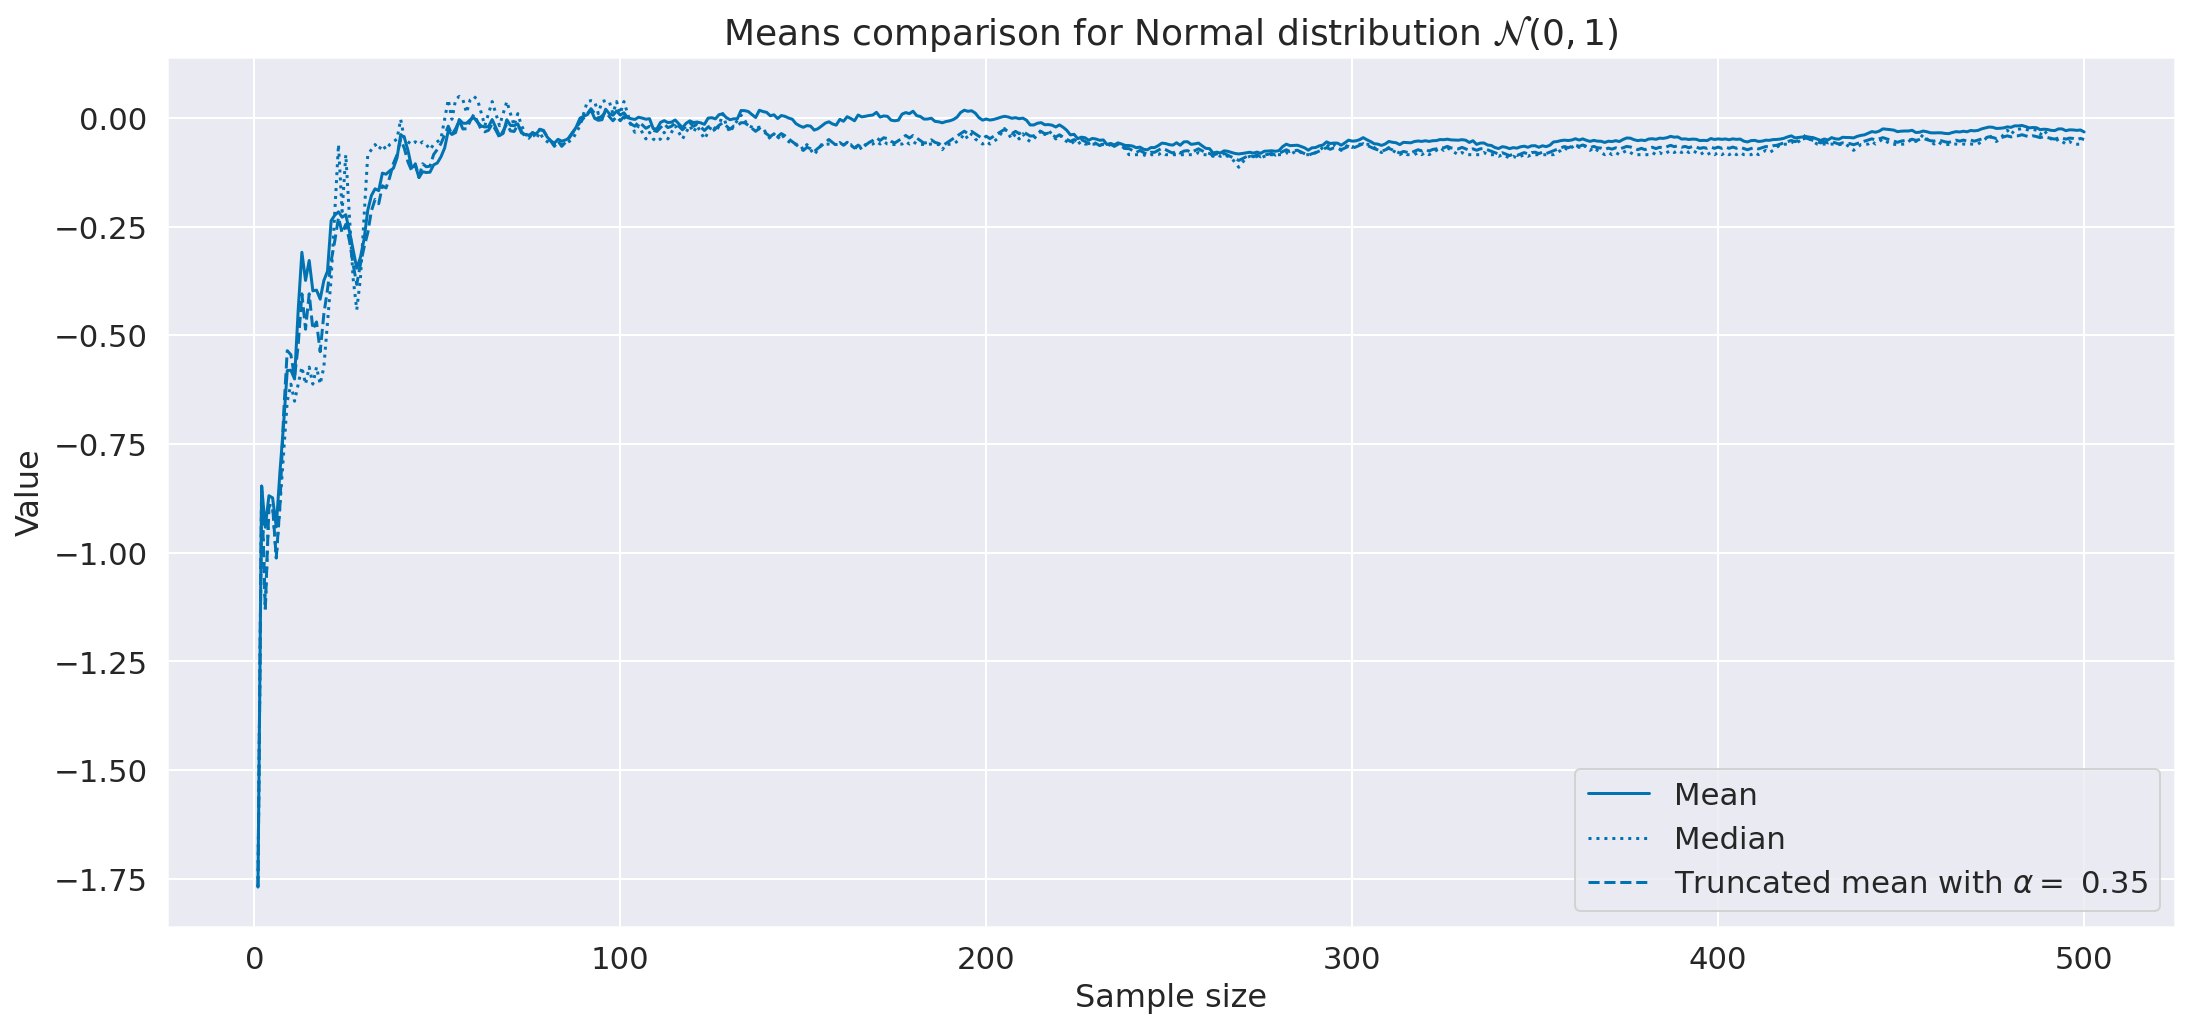

In [ ]:
plot_means_comparison(norm_sample, color_for_normal, r'Normal distribution $\mathcal{N}(0, 1)$')

**Распределение Лапласа**

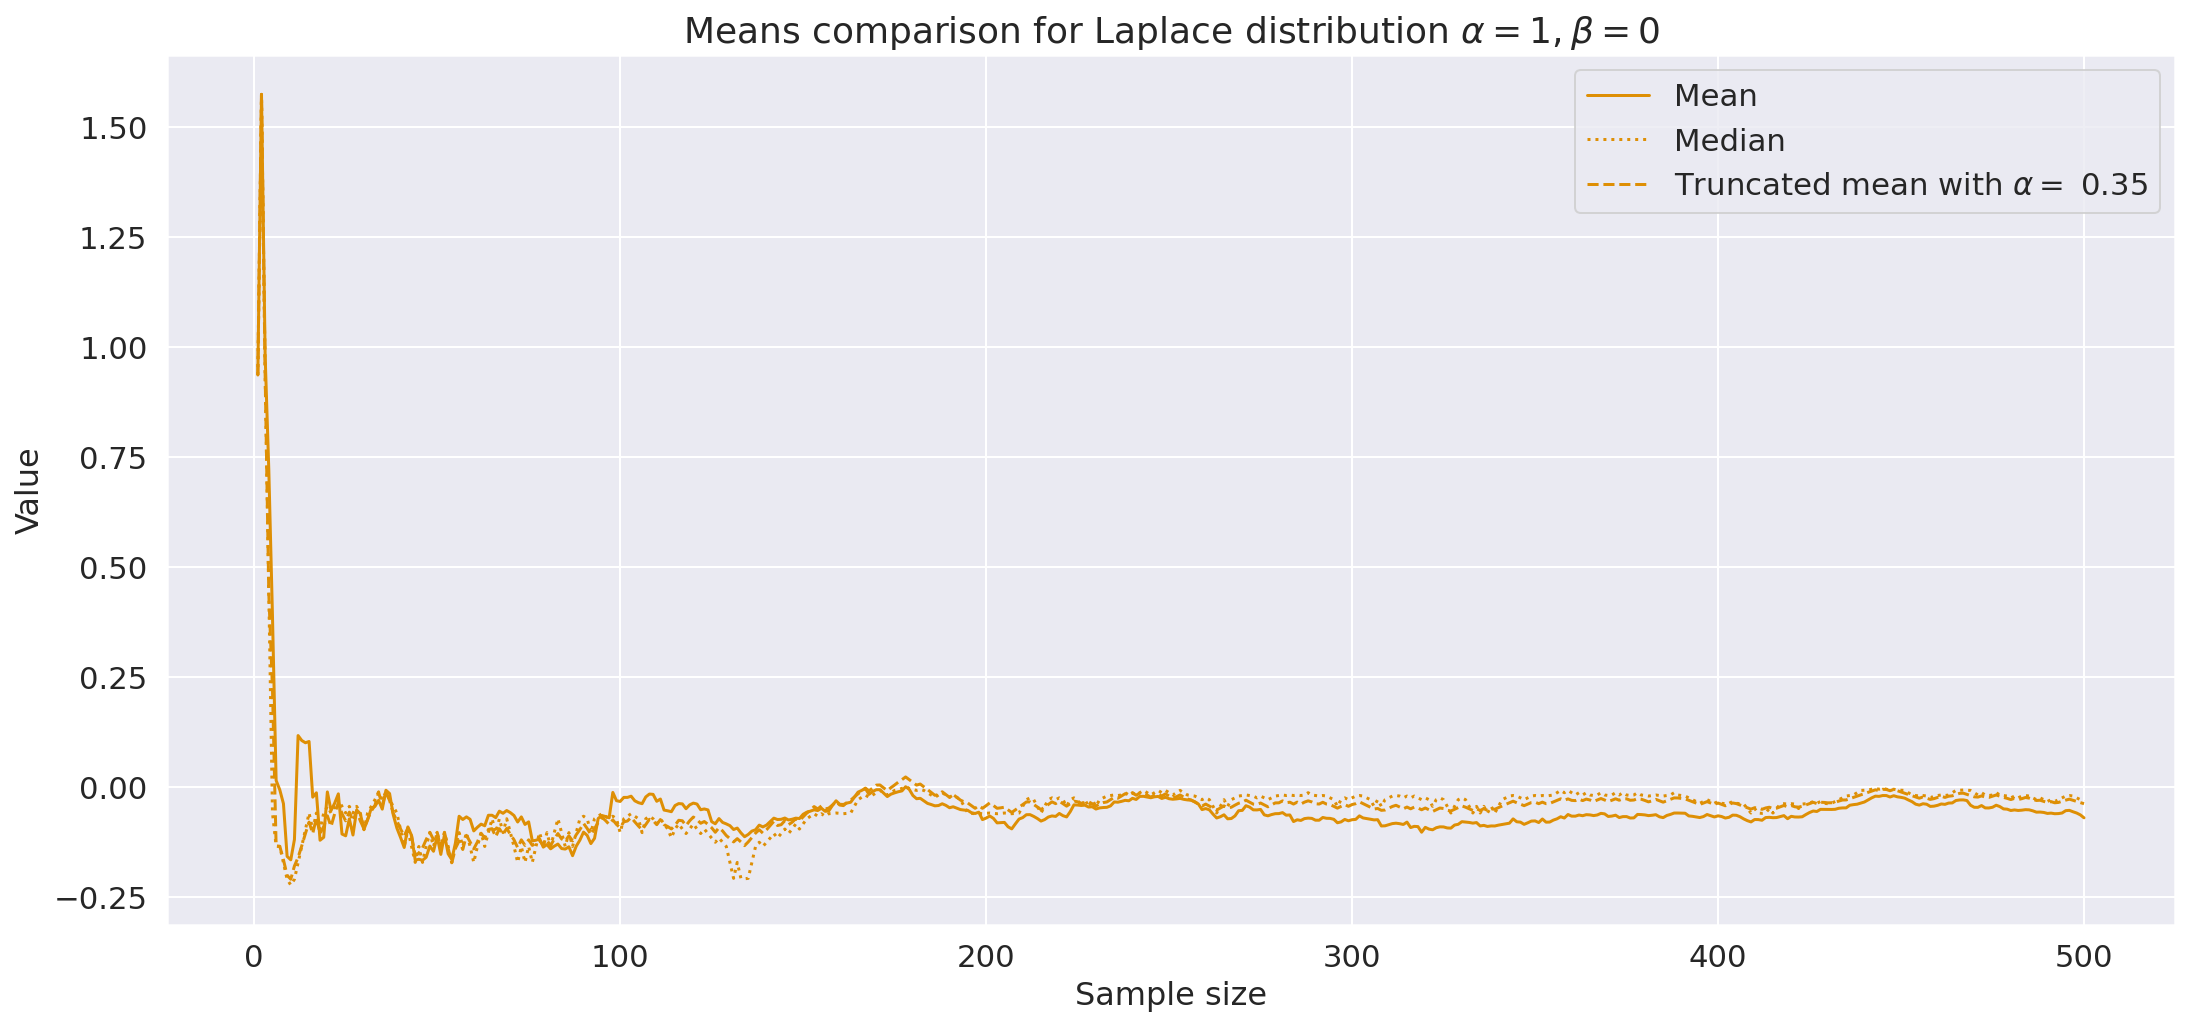

In [ ]:
plot_means_comparison(laplace_sample, color_for_laplace, r'Laplace distribution $\alpha=1, \beta=0$')

**Распределение Коши**

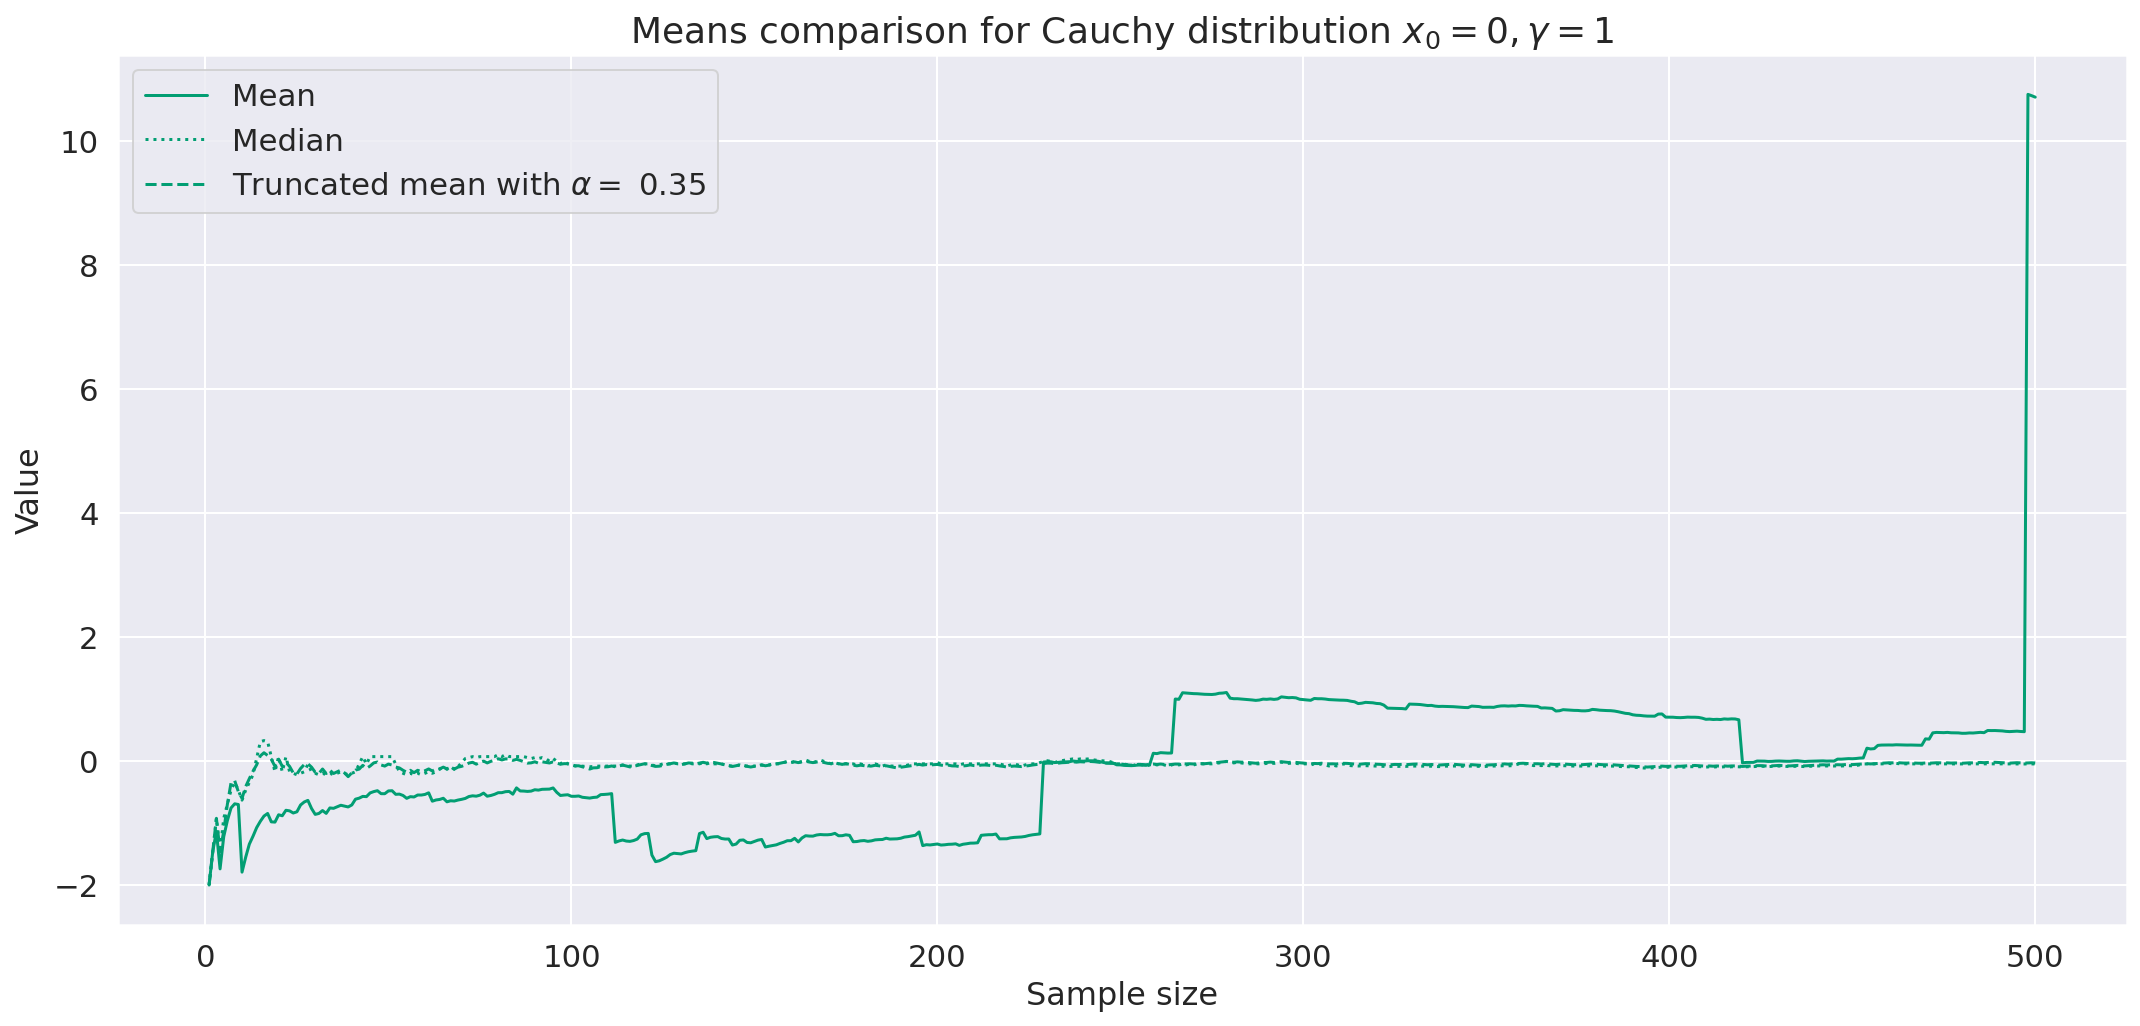

In [ ]:
plot_means_comparison(cauchy_sample, color_for_cauchy, r'Cauchy distribution $x_0=0, \gamma=1$')

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Как мы видим для нормального распределения выборочное среднее действительно чуть ближе к настоящему значению чем медиана, но разница, как и ожидалось незначительная. Для распределения Лапласа видно, что медиана совсем чуть-чуть ближе к реальному значению, чем выборочное среднее. (Ближе = меньше разброс вокруг реального значения при увеличении размера выборки)

Для распределения Коши видно, что выборочное среднее очень плохо показывает реальное положение дел, в то время как медиана и усеченное среднее почти на всем размере выборки практически совпадают с реальным значением.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 36.8MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [ ]:
conditions = [
    (df['alcohol'] <= 10),
    (df['alcohol'] > 10) & (df['alcohol'] <= 12),
    (df['alcohol'] > 12)
    ]

values = ['low alcohol', 'medium alcohol', 'high alcohol']

df['category'] = np.select(conditions, values)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [ ]:
df.groupby('category')['residual sugar'].describe()[['50%','mean']]

,50%,mean
category,,
high alcohol,2.3,2.760993
low alcohol,2.1,2.445984
medium alcohol,2.2,2.592264


In [ ]:
df['residual sugar'].describe()[['50%','mean']]

50%     2.200000
mean    2.538806
Name: residual sugar, dtype: float64

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Видна явная зависимость крепости алкоголя и среднего количества остаточного сахара - чем выше крепость, тем больше в среднем в нем сахара.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

**Замечание:** Из-за выбросов в данных график не особо читаем, сделаем сначала логарифмический масштаб чтобы немного улучшить ситуацию и увидеть эти выбросы.

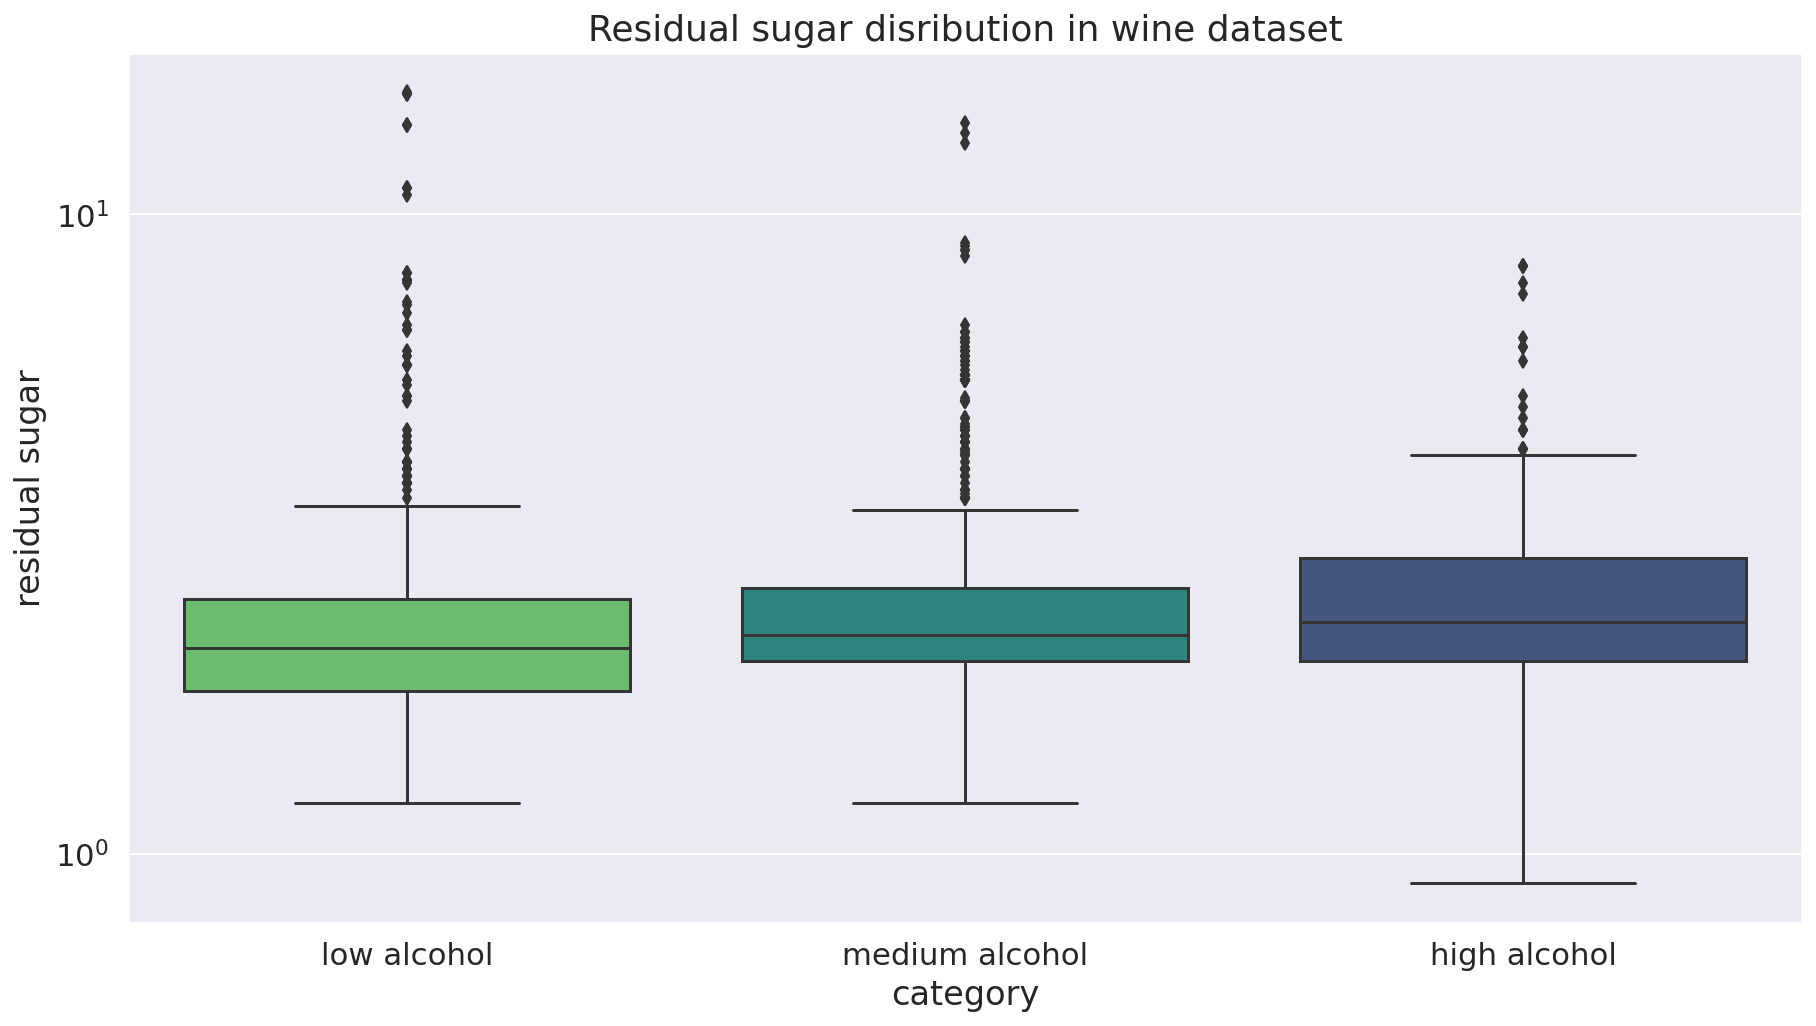

In [ ]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(15, 8))
sns.boxplot(
    x='category',
    y='residual sugar',
    data=df,
    palette=palette
)
plt.yscale('log')
plt.title('Residual sugar disribution in wine dataset', fontsize=18)
plt.show()

Уберем с графика выборосы (в данном случае считаем выбросами все что находится за усами боксплота, то есть все выше 75 перцинтиля).

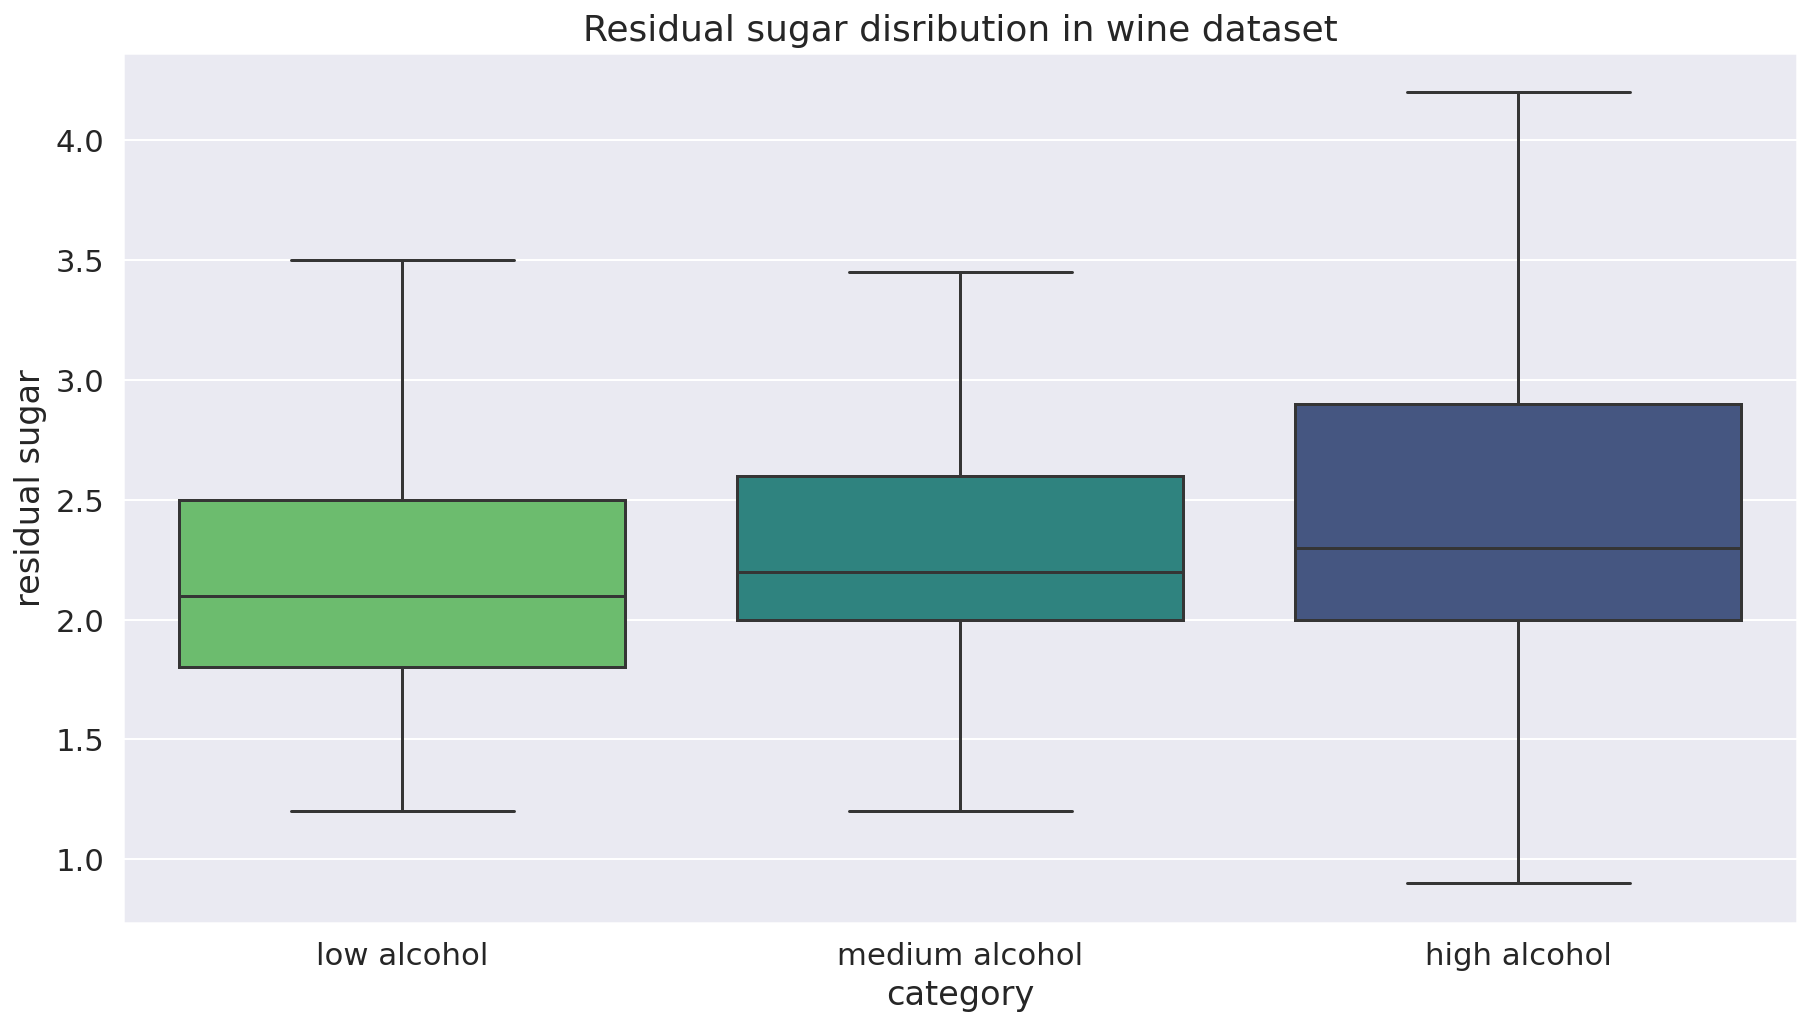

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='category',
    y='residual sugar',
    data=df,
    palette=palette,
    showfliers=False
)
plt.title('Residual sugar disribution in wine dataset', fontsize=18)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** Из-за большого количества выбросов среднее смещается и становится больше, в таких случаях лучше использовать медиану для оценивания содержания сахара.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

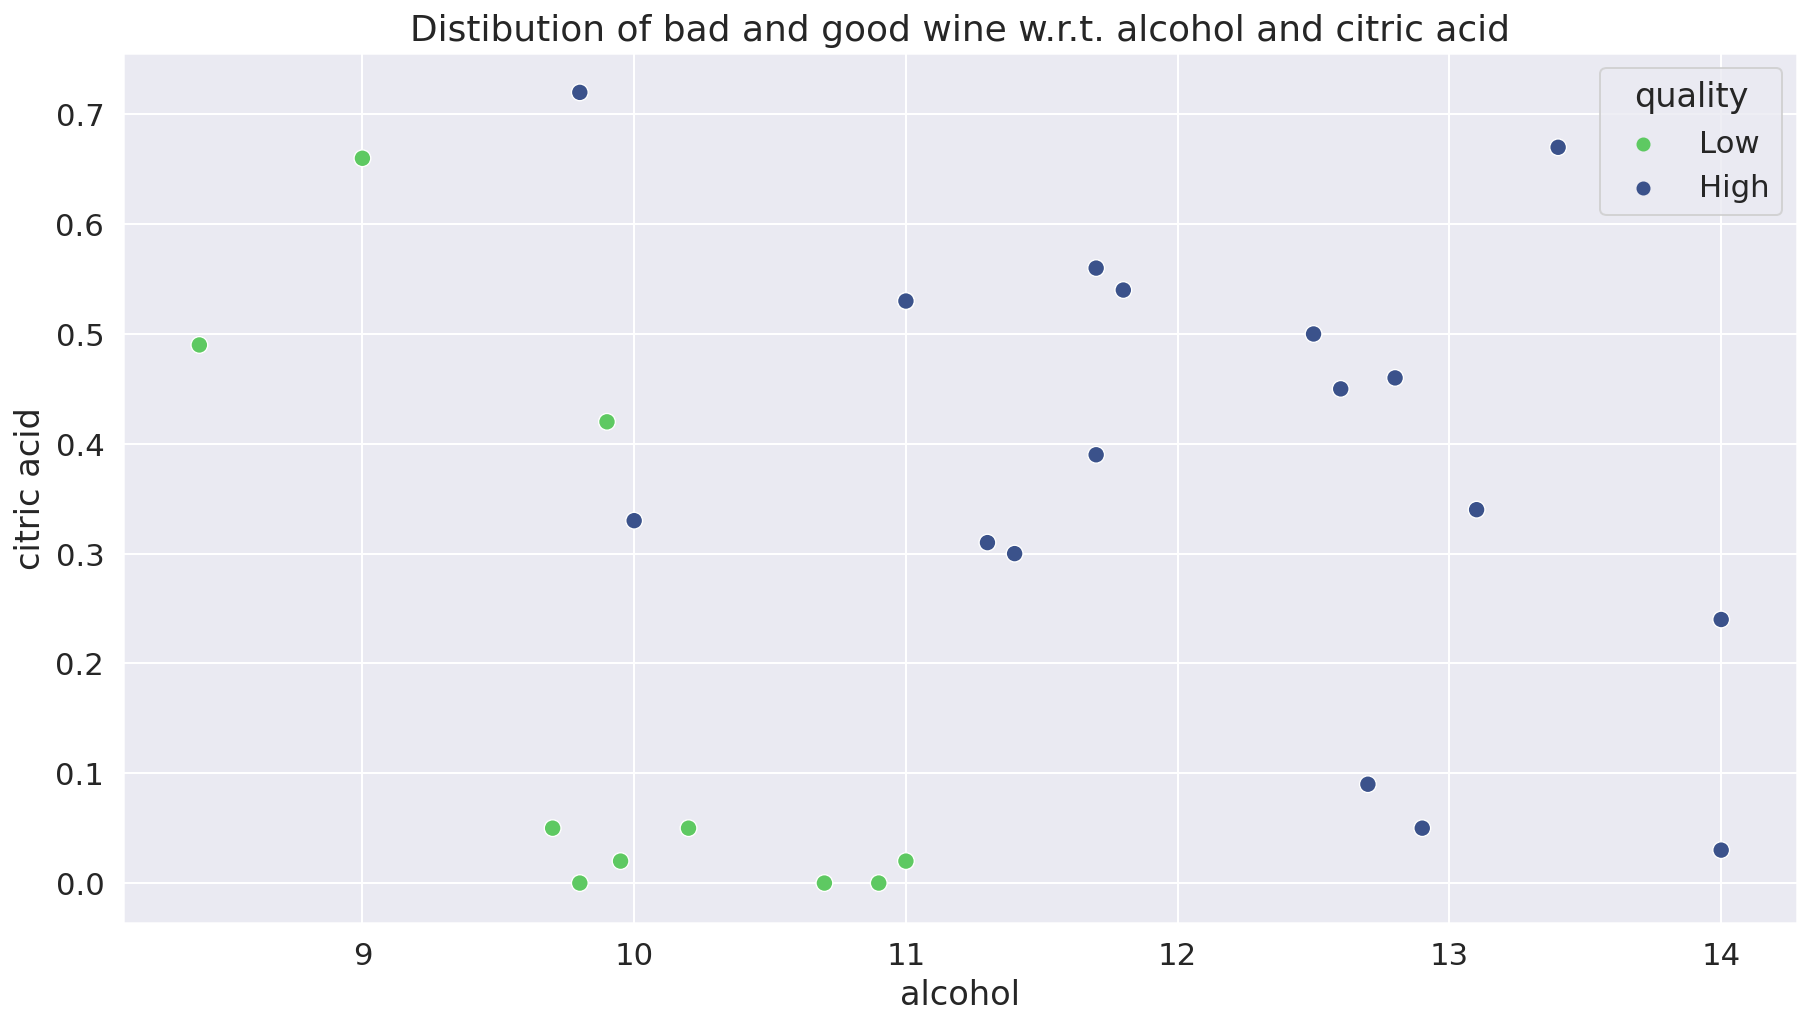

In [ ]:
plt.figure(figsize=(15, 8))

p = sns.scatterplot(
    data=df.query('quality == 3 | quality == 8'),
    x='alcohol', 
    y='citric acid', 
    hue='quality',
    palette=[palette[0]]+[palette[-1]],
    s=70
)

# Set legend title
p.legend_.get_texts()[0].set_text('Low')
p.legend_.get_texts()[1].set_text('High')

plt.title('Distibution of bad and good wine w.r.t. alcohol and citric acid', fontsize=18)
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [ ]:
sample_low_quality = df[df['quality'] == 3][['alcohol', 'citric acid']]
sample_high_quality = df[df['quality'] == 8][['alcohol', 'citric acid']]
sample_low_quality.shape, sample_high_quality.shape

((10, 2), (18, 2))

In [ ]:
normal_low_quality = sps.multivariate_normal(np.mean(sample_low_quality), np.cov(sample_low_quality.T))
normal_high_quality = sps.multivariate_normal(np.mean(sample_high_quality), np.cov(sample_high_quality.T))

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

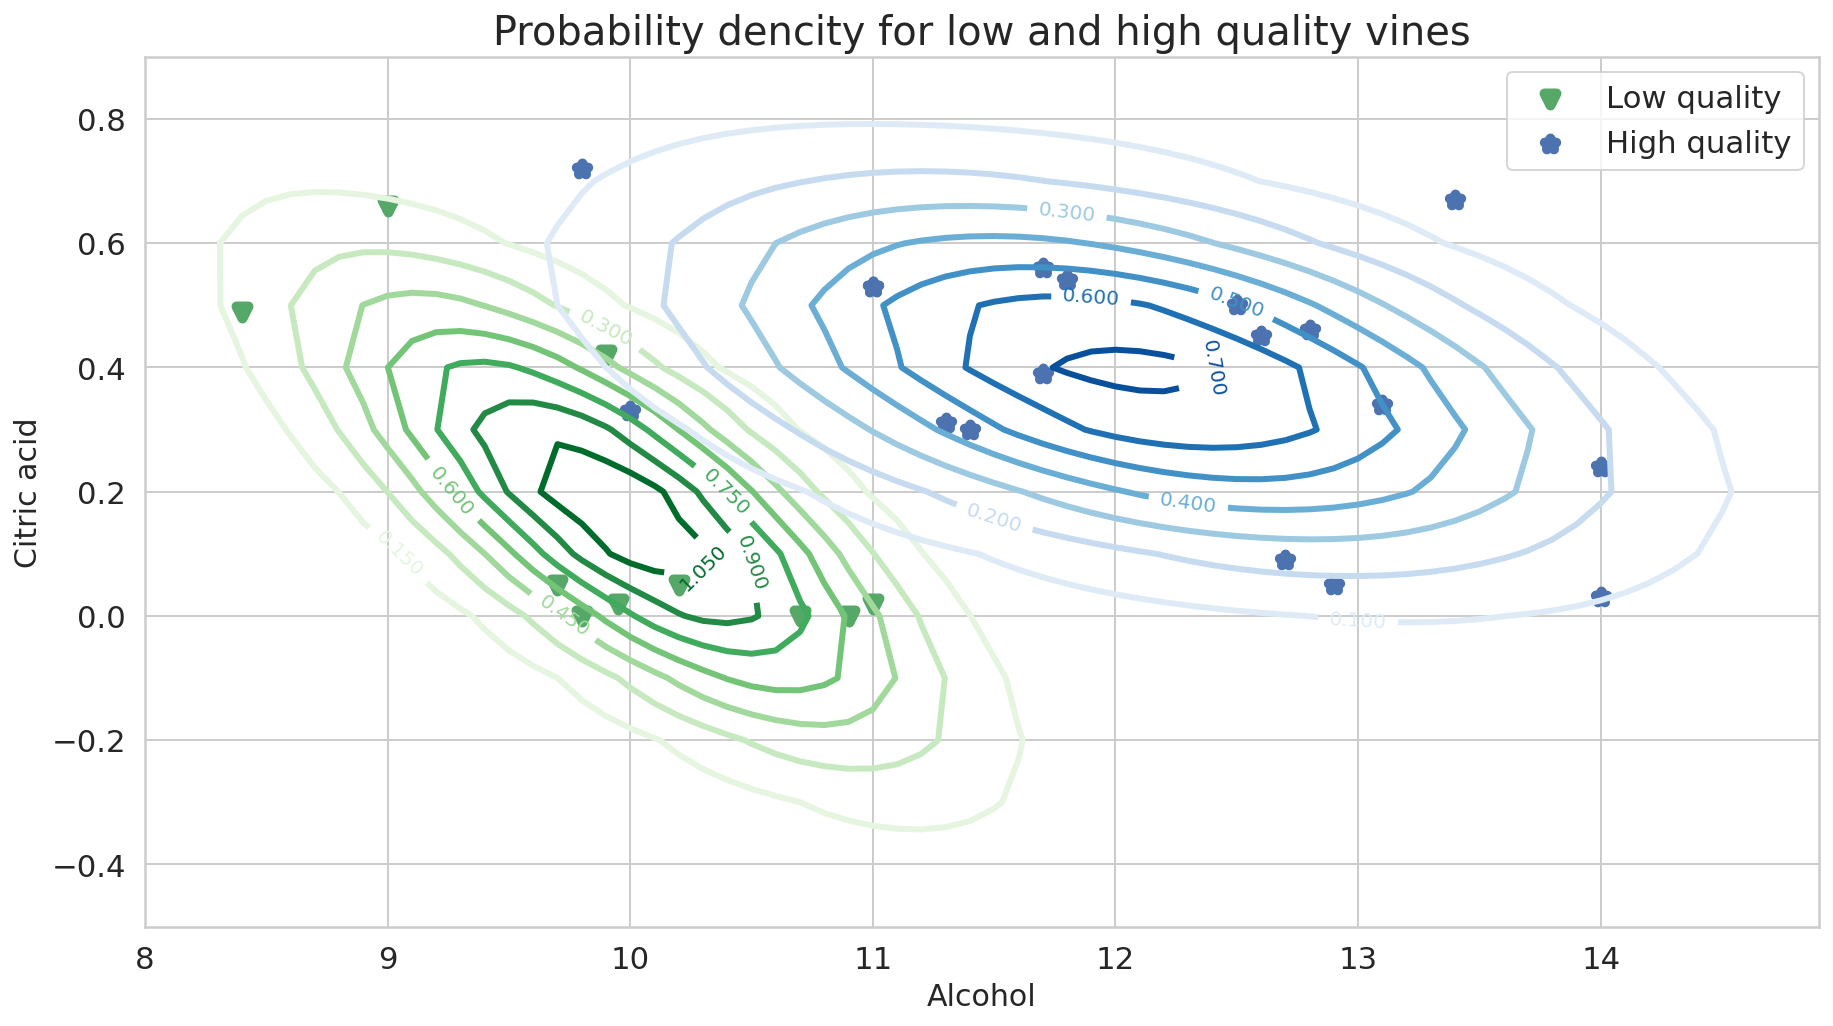

In [ ]:
with sns.axes_style("whitegrid"):
  fig, axis = plt.subplots()
  fig.set_size_inches(15, 8)
  X, Y = np.mgrid[8:15:.1, -0.5:1:.1]

  # low quality pdf
  CS_low = axis.contour(
      X, Y, normal_low_quality.pdf(np.dstack((X, Y))), 
      cmap=get_density_cmap('Greens'),linewidths=3, alpha=1)
  
  axis.clabel(CS_low, inline=True, fontsize=10)
  plt.scatter(
      sample_low_quality['alcohol'], sample_low_quality['citric acid'], 
      marker='v', color='g', linewidths=5, label='Low quality')

  # high quality pdf
  CS_high = axis.contour(
      X, Y, normal_high_quality.pdf(np.dstack((X, Y))),
      cmap=get_density_cmap('Blues'), linewidths=3, alpha=1)
  
  axis.clabel(CS_high, inline=True, fontsize=10)
  plt.scatter(
      sample_high_quality['alcohol'], sample_high_quality['citric acid'], 
      marker='*', color='b', linewidths=5, label='High quality')

  axis.set_title('Probability dencity for low and high quality vines', fontsize=20)
  axis.set_xlabel('Alcohol', fontsize=15)
  axis.set_ylabel('Citric acid', fontsize=15)
  plt.legend()
  plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на графикe выше?

**Ответ:** Можно сказать, что вино, которое оценили выше всех остальных, имеет большее содержание алкоголя и чаще большее содержание лимонной кислоты.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
  [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
  произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

**Неравенство Рао-Крамера**
$$
D_\theta \hat{\theta} \geqslant \frac{(\tau'(\theta))^2}{I_n(\theta)}
$$

В нашем случае $\tau(\theta) = \theta$, a $I_n(\theta) = \frac{n}{\theta(1-\theta)}$, а эффективная оценка, на которой достигается равенство - $\overline{X}$, то есть: 
$$
D_\theta \overline{X} = \frac{\theta(1-\theta)}{n}
$$

In [ ]:
N = 1000

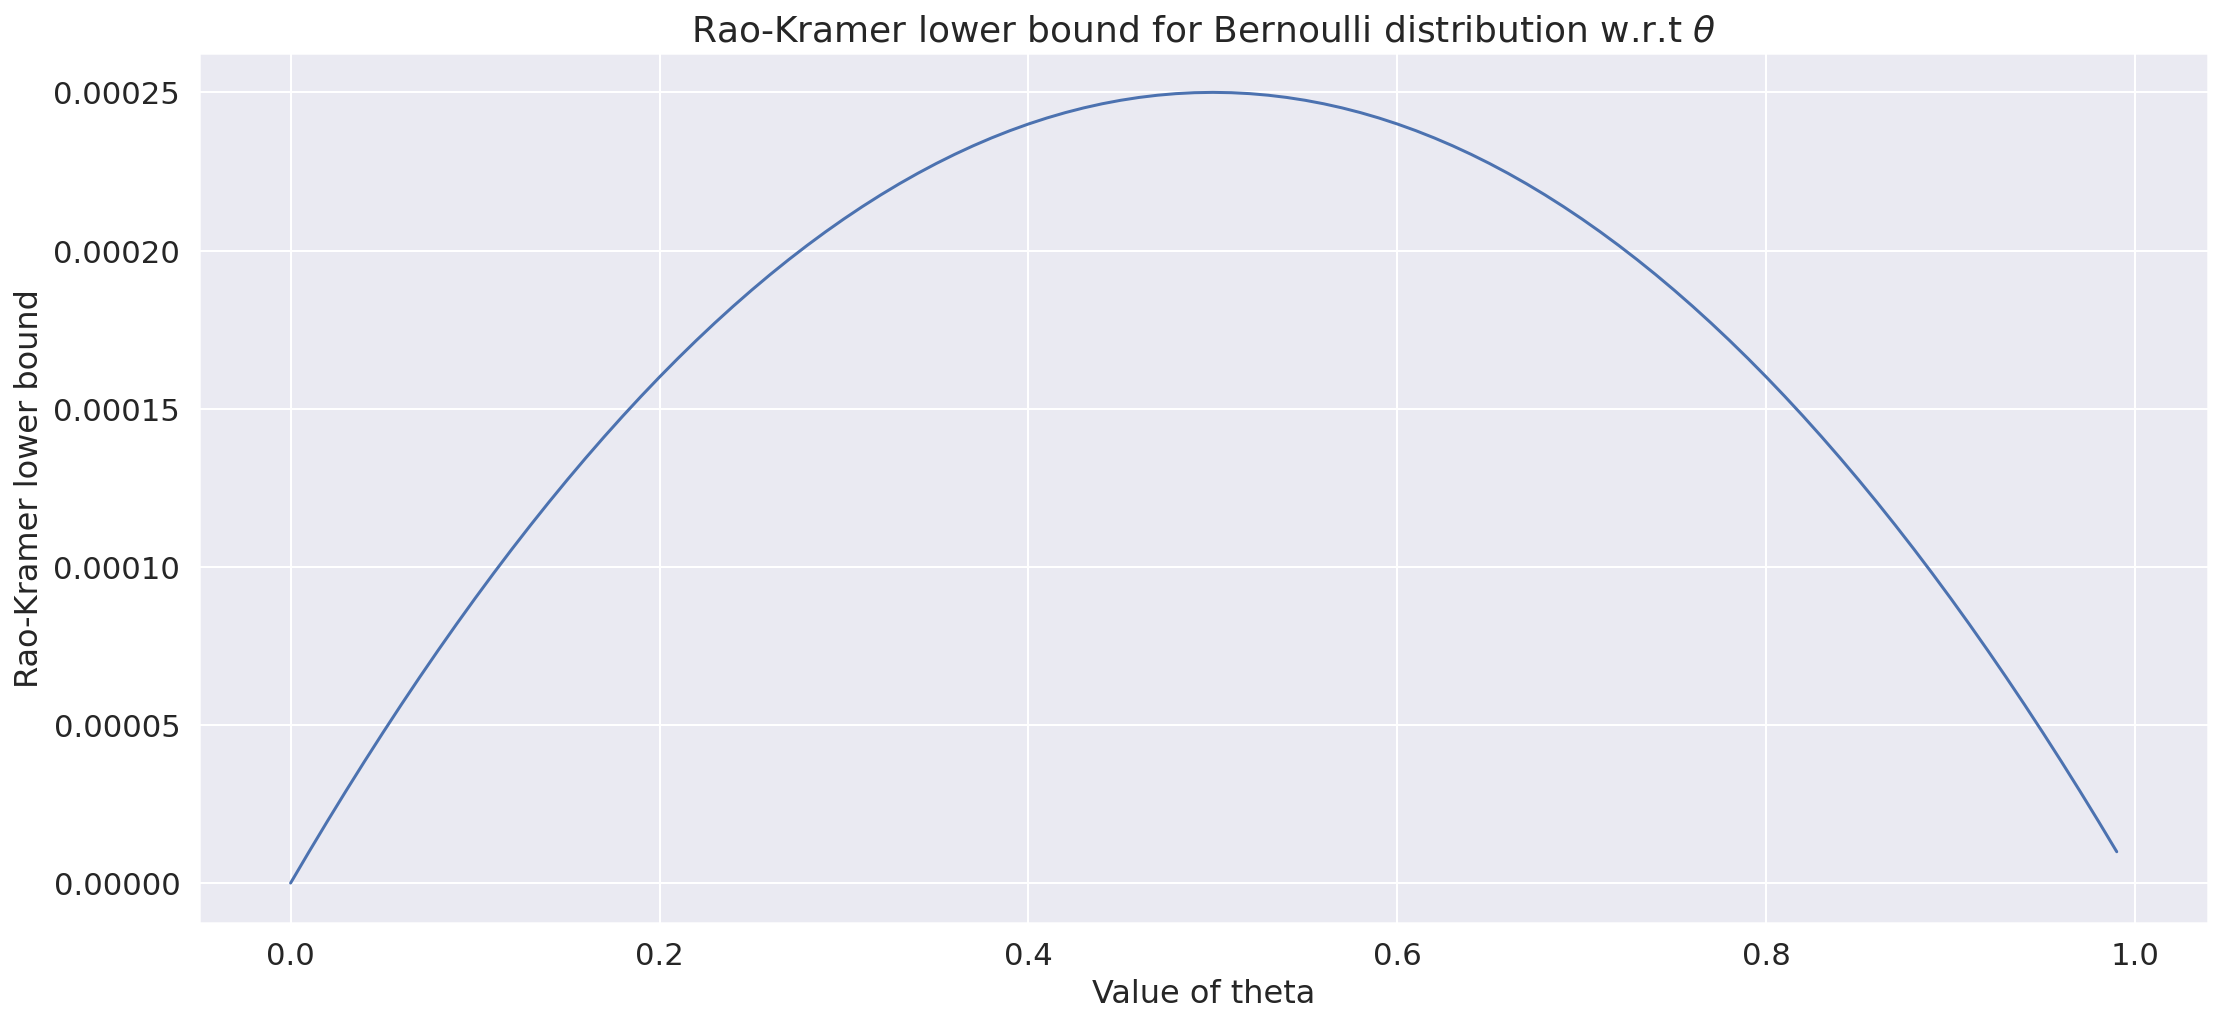

In [ ]:
grid_theta = np.arange(0, 1, 0.01)
lower_bounds = grid_theta * (1 - grid_theta) / N
plt.figure(figsize=(18,8))
plt.title(r'Rao-Kramer lower bound for Bernoulli distribution w.r.t $\theta$', fontsize=18)

plt.plot(grid_theta, lower_bounds)

plt.xlabel('Value of theta', fontsize=16)
plt.ylabel('Rao-Kramer lower bound', fontsize=16)
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** Нижняя граница на дисперсию наибольшая при $p=\frac{1}{2}$.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

Как описал выше в нашем случае эффективная оценка это $\overline{X}$ - то есть `np.mean`

In [ ]:
BERN_EFFECTIVE_ESTIMATOR = np.mean

In [ ]:
def get_samples_on_grid(theta_grid: np.array) -> np.array:
  samples_for_grid = list()
  for new_theta in grid_theta:
    samples_for_grid.append(sps.bernoulli(p=new_theta).rvs(size=N))
  return np.array(samples_for_grid)

def count_estimation_on_grid(samples: np.array, theta_grid: np.array, estimator) -> np.array:
  assert samples.shape[0] == len(theta_grid)
  estims_for_grid = list()
  for i, new_theta in enumerate(grid_theta):
    estims_for_grid.append(estimator(samples[i]))
  return np.array(estims_for_grid, dtype=float)

def sample_mean(sample: np.array) -> np.array:
  return np.cumsum(sample) / (np.arange(len(sample)) + 1)


In [ ]:
class Bootstrap:
  BS_SAMPLE_SIZE = 1000
  @staticmethod
  def variance_of_estimation(samples: np.array, estimator_function) -> np.array:
    assert len(samples.shape) == 2  # we assert that 'samples' is 2D array of 1D samples 

    variances = np.zeros(samples.shape[0], dtype=float)      
    for i, new_sample in enumerate(samples):
      bootstrap_samples = np.random.choice(
          new_sample, (Bootstrap.BS_SAMPLE_SIZE, Bootstrap.BS_SAMPLE_SIZE))
      
      estimations_for_boot_samples = np.apply_along_axis(
          lambda row: estimator_function(row),
          axis=1, 
          arr=bootstrap_samples)
      variances[i] = np.var(estimations_for_boot_samples)
    return variances

In [ ]:
samples_for_thetas = get_samples_on_grid(grid_theta)

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

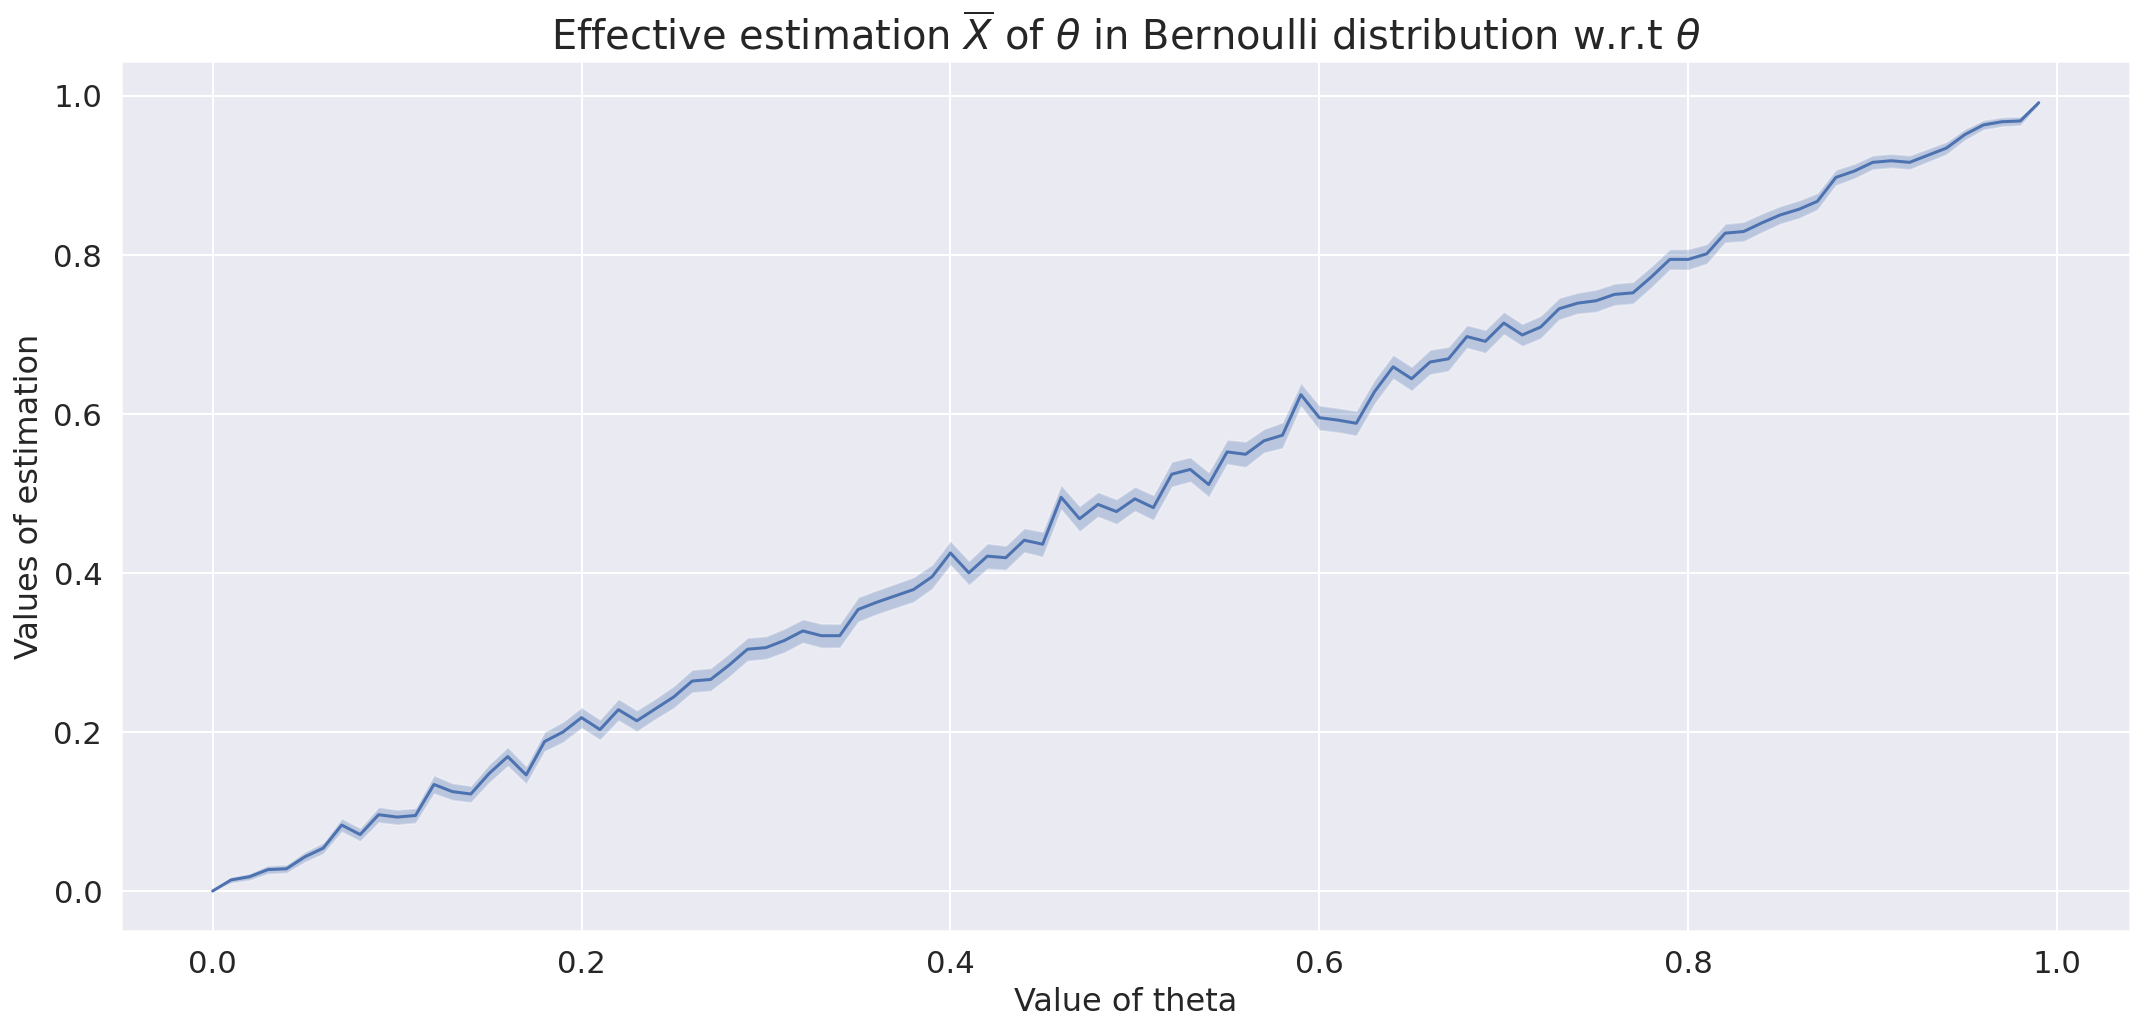

In [ ]:
grid_theta = np.arange(0, 1, 0.01)

stds = np.sqrt(Bootstrap.variance_of_estimation(samples_for_thetas, BERN_EFFECTIVE_ESTIMATOR))
effictive_estim = count_estimation_on_grid(samples_for_thetas, grid_theta, BERN_EFFECTIVE_ESTIMATOR)

plt.figure(figsize=(18,8))
plt.title(r'Effective estimation $\overline{X}$ of $\theta$ in Bernoulli distribution w.r.t $\theta$', fontsize=20)

plt.plot(grid_theta, effictive_estim)

plt.fill_between(x=grid_theta, y1=effictive_estim + stds, y2=effictive_estim - stds, alpha=0.3)

plt.xlabel('Value of theta', fontsize=16)
plt.ylabel('Values of estimation', fontsize=16)
plt.show()

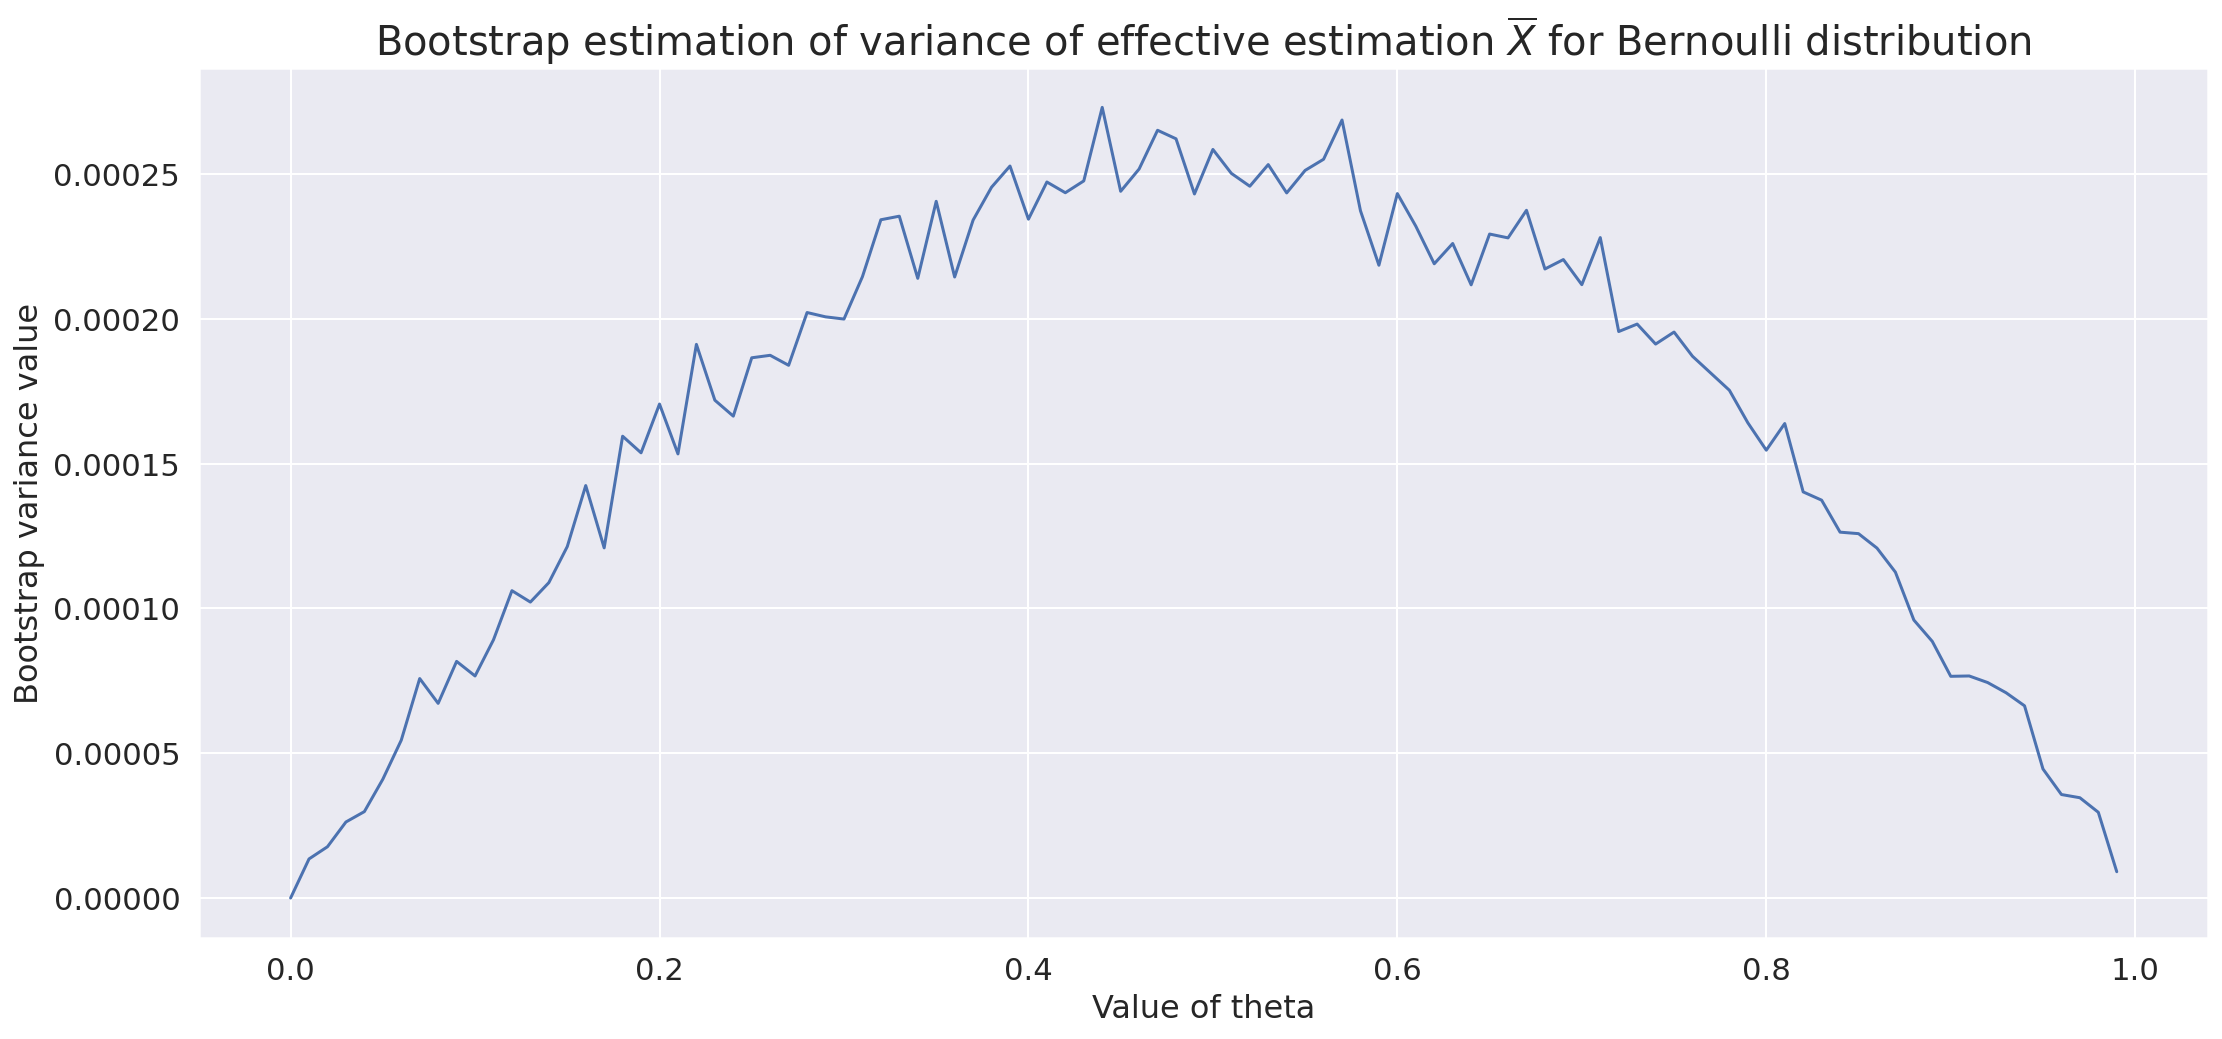

In [ ]:
grid_theta = np.arange(0, 1, 0.01)

bootstrap_vars = Bootstrap.variance_of_estimation(samples_for_thetas, BERN_EFFECTIVE_ESTIMATOR)

plt.figure(figsize=(18,8))
plt.title(r'Bootstrap estimation of variance of effective estimation $\overline{X}$ for Bernoulli distribution', fontsize=20)

plt.plot(grid_theta, bootstrap_vars)

plt.xlabel('Value of theta', fontsize=16)
plt.ylabel('Bootstrap variance value', fontsize=16)
plt.show()

**Вывод** На первом графике мы видим, что, эффективная оценка близка к реальному значению, причем имеет достаточно маленькое стандартное отклоение, оценку которого мы получили с помощью бутстрепа.

На втором графике мы видим, что бутстрепная оценка дисперсии дает очень близкий результат к теоритической дисперсии эффективной оценки, которую мы считали выше, что говорит о том что такой метод оценивания достаточно эффективен.